## Patient Survey Ratings released by Centers for Medicare & Medicaid Services(CMS)

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# State name and abbrev
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 
          'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 
          'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 
          'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 
          'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 
          'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 
          'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 
          'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 
          'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 
          'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
states_abb = dict((v,k) for k,v in states.items())

## Questions to answer:
### - Is the health care quality balanced or unbalanced through out 51 states and districts in US?
### - What factors are the most important indicators for low hospital rating at state level?


# Load and Clean Data 

In [24]:
# Load Hospital Compare Data downloaded from CMS
id_2015 = next(os.walk('2015/'))[2]

df_year = pd.DataFrame()

for file in id_2015:
    f= pd.read_csv('2015/' + file, encoding = 'cp1252')
    f['year'] = f['Measure End Date'].astype(str).apply(lambda x: x[-4:])
    f = f[f['HCAHPS Question'] == 'Summary star rating']
    f = f[f['Patient Survey Star Rating'] !='Not Available']
    f['Patient Survey Star Rating'] = f['Patient Survey Star Rating'].astype(np.float32)
    #f = f.drop(columns=['Measure Start Date', 'Measure End Date', 'Address','County Name', 'Phone Number', 'HCAHPS Measure ID','Survey Response Rate Percent Footnote','Patient Survey Star Rating Footnote','HCAHPS Linear Mean Value','HCAHPS Answer Percent Footnote'], axis=1)
    df_year = pd.concat([df_year, f])

df = df_year.copy()
df = df.drop(columns=['Provider ID','Address','HCAHPS Measure ID','HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent Footnote',
                    'Number of Completed Surveys Footnote','HCAHPS Linear Mean Value','Patient Survey Star Rating Footnote','Phone Number',
                      'Measure Start Date', 'Measure End Date','HCAHPS Question', 'Footnote'], axis=1)
df.year = df.year.astype(np.str)
df1 = df.groupby(['year', 'State'], as_index=False).mean() #.sort_values(['Patient Survey Star Rating'],ascending=False)
y_2014 = df1[df1.year == '2014'].sort_values('Patient Survey Star Rating', ascending=False)
y_2015 = df1[df1.year == '2015'].sort_values('Patient Survey Star Rating', ascending=False)
y_2016 = df1[df1.year == '2016'].sort_values('Patient Survey Star Rating', ascending=False)
y_2017 = df1[df1.year == '2017'].sort_values('Patient Survey Star Rating', ascending=False)

dfall=pd.merge(pd.merge(pd.merge(y_2014, y_2015, how='outer', on=['State']), y_2016, how='outer', on=['State']), y_2017, how='outer', on=['State'])

dfall.columns=['year_x', 'State', 'Patient Survey Star Rating_x', 'ZIP Code_x',
       'year_y', 'Patient Survey Star Rating_y', 'ZIP Code_y', 'year_a',
       'Patient Survey Star Rating_a', 'ZIP Code_a', 'year_b',
       'Patient Survey Star Rating_b', 'ZIP Code_b']
dfall.drop(columns=['ZIP Code_x','ZIP Code_y','ZIP Code_a','ZIP Code_b', 'year_x','year_b', 'year_y','year_a' ], axis=1, inplace=True)
dfall.rename(columns={'Patient Survey Star Rating_x': 'Rating_2014','Patient Survey Star Rating_y': 'Rating_2015', 
         'Patient Survey Star Rating_a': 'Rating_2016', 'Patient Survey Star Rating_b': 'Rating_2017' }, inplace=True)    
dfall['Rating'] = dfall[['Rating_2014','Rating_2015','Rating_2016','Rating_2017']].mean(axis=1)
dfall = dfall[['State', 'Rating']].sort_values(by=['Rating'], ascending=False)
dfall.head()

C:\Users\Ming\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


,State,Rating
0,SD,4.030206
1,WI,4.000117
3,NE,3.900504
2,ME,3.853001
4,MN,3.812509


### Health care quality is unbalanced throughout the states

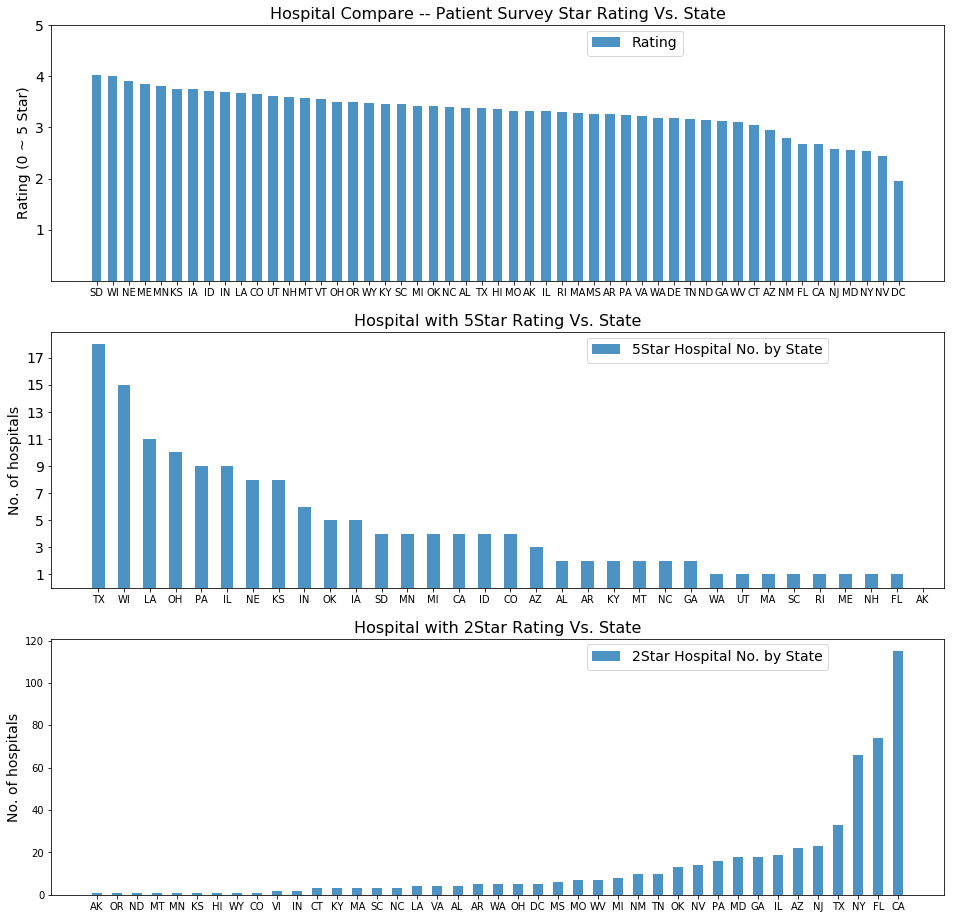

In [28]:
plt.figure(figsize=(16,16))
plt.subplot(3,1,1)
plt.bar(df_35['State'], df_35['Rating'], label='Rating', width=0.6, alpha=0.8)
plt.yticks([1,2,3,4,5],fontsize=14);

plt.legend(fontsize=14,loc=(0.6, 0.88))
ax = plt.gca()
ax.set_title('Hospital Compare -- Patient Survey Star Rating Vs. State', fontsize=16)
ax.set_ylabel('Rating (0 ~ 5 Star)',fontsize=14)
ax.set_xticklabels(df_35['State'], fontsize=10);
#ax2= ax.twinx()
#ax2.plot(df_35['State'], df_35['Population'], 'ro-', label='Population')
##ax2.set_ylabel('Population', fontsize=14)
#plt.legend(fontsize=14,loc=(0.87,0.88))
plt.subplot(3,1,2)
plt.bar(hospital_star['State'], hospital_star['5Star'],label='5Star Hospital No. by State',width=0.5, alpha=0.8)
plt.title('Hospital with 5Star Rating Vs. State', fontsize=16)
plt.yticks(range(1,18,2),fontsize=14)
plt.ylabel('No. of hospitals',fontsize=14)
plt.legend(loc=(0.6,0.88),fontsize=14)
plt.subplot(3,1,3)
plt.bar(hospital_2s['State'], hospital_2s['2Star'],label='2Star Hospital No. by State',width=0.5, alpha=0.8)
plt.title('Hospital with 2Star Rating Vs. State', fontsize=16)
#plt.yticks(range(1,18,2),fontsize=14)
plt.ylabel('No. of hospitals',fontsize=14)
plt.legend(loc=(0.6,0.88),fontsize=14)

In [26]:
# Feature1 -- Population:
population = pd.read_excel('feature/nst-est2017-01.xlsx', skiprows=3).iloc[5:, :].reset_index()
population.rename(columns={'Unnamed: 0': 'State',2016:'Population'}, inplace=True)
population.State=population.State.astype(np.str).apply(lambda x: x.replace('.', ''))
population['State'] = population['State'].map(states_abb)
population.drop(columns=['Estimates Base','Census', 2010, 2011, 2012, 2013,2014,2015,2017,'index'],inplace=True)

In [5]:
# Feature2 -- Hospital No.
hospital = pd.read_csv('2015/' + 'HCAHPS - Hospital12.csv', encoding = 'cp1252')
hospital = hospital[['Hospital Name', 'State']].groupby(['State','Hospital Name'], as_index=False).size().reset_index()
dfc = pd.DataFrame(hospital['State'].value_counts()).reset_index()
dfc.rename(columns={'index':'State', 'State':'Hospital'}, inplace=True)

In [6]:
# Feature3~6 -- Expenditures by Service by State to Physician, Hospital, Prescription and Nurses
statecost = pd.read_csv('feature/Expenditures by Service by State.csv', skiprows=1)
statecost=statecost.iloc[1:52]
#dfpdm.drop(columns = ['Nonmetropolitan', 'Total'], inplace=True)
statecost['Location']=statecost['Location'].map(states_abb)
statecost.rename(columns={'Location':'State'}, inplace=True)
statecost.drop(['Total','Home Health Care','Other Health, Residential, and Personal Care','Medical Durables','Dental Services'], axis=1, inplace=True)
statecost[['Hospital Care','Physician and Other Professional Services','Prescription Drugs and Other Medical Nondurables',
           'Nursing Home Care']]=statecost[['Hospital Care','Physician and Other Professional Services',
            'Prescription Drugs and Other Medical Nondurables','Nursing Home Care']]*100
statecost.rename(columns={'Hospital Care':'StateHospi','Physician and Other Professional Services':'StatePhy',
                'Prescription Drugs and Other Medical Nondurables':'StatePrescri','Nursing Home Care':'StateNur' }, inplace=True)

In [7]:
# Feature7 -- Hospital Cost Inpatient Per Day
hospiCost = pd.read_csv('feature/HospitalCostInpatientDay.csv', skiprows=1)
hospiCost=hospiCost.iloc[1:52]
#dfpdm.drop(columns = ['Nonmetropolitan', 'Total'], inplace=True)
hospiCost['Location']=hospiCost['Location'].map(states_abb)
hospiCost.rename(columns={'Location':'State'}, inplace=True)
hospiCost['Expenses per Inpatient Day'] = hospiCost['Expenses per Inpatient Day'].astype(str).apply(lambda x: x.replace('$', ''))
hospiCost['Expenses per Inpatient Day'] = hospiCost['Expenses per Inpatient Day'].apply(lambda x: x.replace(',', ''))
hospiCost['Expenses per Inpatient Day'] = hospiCost['Expenses per Inpatient Day'].astype(np.float)

In [8]:
# Feature8 -- Physician number per State
PhysciNo= pd.read_csv('feature/Physician.csv', skiprows=1)
PhysciNo=PhysciNo.iloc[1:52]
PhysciNo['Location']=PhysciNo['Location'].map(states_abb)
PhysciNo.rename(columns={'Location':'State', 'Total': 'PhysicianNo'}, inplace=True)

In [9]:
# Feature9 -- Percent of Adults Without a Usual Place of Medical Care
AdultNoPhysician= pd.read_csv('feature/Percent of Adults Without a Usual Place of Medical Care.csv', skiprows=2)
AdultNoPhysician=AdultNoPhysician.iloc[1:52]
#dfpdm.drop(columns = ['Nonmetropolitan', 'Total'], inplace=True)
AdultNoPhysician['Location']=AdultNoPhysician['Location'].map(states_abb)
AdultNoPhysician.rename(columns={'Location':'State', 'Percentage':'AdultNoPhysican%'}, inplace=True)
AdultNoPhysician['AdultNoPhysican%'] = AdultNoPhysician['AdultNoPhysican%']*100

In [10]:
# Feature10 -- Nursing Facilities per State
NurseFacility = pd.read_csv('feature/Nursing Facilities.csv', skiprows=1)
NurseFacility =NurseFacility .iloc[1:52]
#dfpdm.drop(columns = ['Nonmetropolitan', 'Total'], inplace=True)
NurseFacility ['Location']=NurseFacility ['Location'].map(states_abb)
NurseFacility .rename(columns={'Location':'State'}, inplace=True)

In [11]:
# Feature11 -- Physician shortage per area 1:3million population
PhysicianShort = pd.read_csv('feature/HPSAs.csv', skiprows=1)
PhysicianShort=PhysicianShort.iloc[1:52]
PhysicianShort['Location']=PhysicianShort['Location'].map(states_abb)
PhysicianShort.rename(columns={'Location':'State'}, inplace=True)
PhysicianShort.drop('Footnotes', axis=1, inplace=True)

In [12]:
# Feature12 ~ 15 -- Insurance Coverage Rate by State: 'Employer','Medicaid','Uninsured','Medicare'
insured = pd.read_csv('feature/Insurance_coverage.csv', skiprows=1)
insured = insured.iloc[1:52]
insured.rename(columns={'Location': 'State'}, inplace=True)
#insured.sort_values(by=['Uninsured'], inplace=True)
insured['State'] = insured['State'].map(states_abb)
insured.drop(['Other Public','Total','Non-Group'], axis = 1, inplace=True)
insured[['Employer','Medicaid','Uninsured','Medicare']] = insured[['Employer','Medicaid','Uninsured','Medicare']] * 100

In [13]:
# Feature16 -- Poverty Level
poverty = pd.read_csv('feature/Poverty.csv', skiprows=1)
poverty=poverty.iloc[1:53]
poverty['Location']=poverty['Location'].map(states_abb)
poverty.rename(columns={'Location':'State'}, inplace=True)
poverty=poverty.iloc[:, :3]

In [14]:
# Feature17 -- Metropolitan Level
metropolitan = pd.read_csv('feature/Metro_level.csv', skiprows=2)
metropolitan=metropolitan.iloc[1:52]
metropolitan.drop(columns = ['Nonmetropolitan', 'Total'], inplace=True)
metropolitan['Location']=metropolitan['Location'].map(states_abb)
metropolitan.rename(columns={'Location':'State'}, inplace=True)
metropolitan['Metropolitan'] = metropolitan['Metropolitan'] * 100

In [15]:
# Feature18 -- Obese rate
obese= pd.read_csv('feature/Obese.csv', skiprows=1)
obese=obese.iloc[1:52]
obese['Location']=obese['Location'].map(states_abb)
obese.rename(columns={'Location':'State'}, inplace=True)
obese['Adult Overweight/Obesity Rate'] = obese['Adult Overweight/Obesity Rate']*100
obese.drop(['Footnotes'], axis=1, inplace=True)

In [16]:
# Feature19 -- Median Income
mincome = pd.read_csv('feature/Median_income.csv', skiprows=1)
mincome=mincome.iloc[1:52]
mincome['Location']=mincome['Location'].map(states_abb)
mincome.rename(columns={'Location':'State'}, inplace=True)
mincome.rename(columns={'Unnamed: 1':'Median_income'}, inplace=True)
mincome['Median_income'] = mincome['Median_income'].apply(lambda x: x.replace('$', ''))
mincome['Median_income'] = mincome['Median_income'].apply(lambda x: x.replace(',', ''))
mincome['Median_income'] = mincome['Median_income'].astype(np.float)

In [17]:
# Feature20~28 -- Hospital Ownership
own = pd.read_csv('feature/Hospital General Information.csv',encoding = 'cp1252')
own.drop(['Phone Number','Address','County Name','Readmission national comparison footnote','Patient experience national comparison footnote',
          'Effectiveness of care national comparison footnote','Timeliness of care national comparison footnote','Hospital overall rating footnote',
         'Mortality national comparison footnote','Safety of care national comparison footnote','Timeliness of care national comparison footnote',
         'Efficient use of medical imaging national comparison footnote','Meets criteria for meaningful use of EHRs','Emergency Services'], axis=1, inplace=True)
a = pd.DataFrame(own.groupby(['State','Hospital Ownership'], as_index=False).size()).reset_index()
a.columns.values[2] = 'Count'
lst = a['Hospital Ownership'].unique()

f2 = a[a['Hospital Ownership'] == lst[0]]
for i in range(1, len(lst)):
    f = a[a['Hospital Ownership'] == lst[i]]
    f.rename(columns={'Count': lst[i]}, inplace=True)
    f.drop(['Hospital Ownership'], axis=1, inplace=True)
    f2 = pd.merge(f2, f, on='State', how='outer')
f2.drop(['Hospital Ownership', 'Tribal'], axis=1, inplace=True)
f2.rename(columns={'Count': 'Government-Federal'}, inplace=True)
f2.fillna(0, inplace=True)

C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
# Feature29 -- Readmission Rate by State
read = pd.read_csv('feature/Hospital_Readmission_Rates.csv')
read1 = read[['Hospital Name','State','Expected Readmission Rate']]
read1 = read1[read1['Expected Readmission Rate'] != 'Not Available']
read1['Expected Readmission Rate']=read1['Expected Readmission Rate'].astype(np.float)
read_hos = read1.groupby(['Hospital Name', 'State'], as_index=False).mean()
read_state = read_hos.groupby(['State'], as_index=False).mean().sort_values(by=['Expected Readmission Rate'], ascending=False)

In [19]:
# Feature35 -- Population by Age
age = pd.read_csv('feature/Population Distribution by Age.csv', skiprows=1)
age = age.iloc[1:52]
age['Location']=age['Location'].map(states_abb)
age.rename(columns={'Location':'State'}, inplace=True)
age.drop('Total', axis=1, inplace=True)
age.iloc[:, 1:] = age.iloc[:, 1:]*100

In [27]:
flst = [population,statecost,dfc,hospiCost,PhysciNo, AdultNoPhysician,NurseFacility,PhysicianShort,insured,poverty,metropolitan,
        obese,mincome,f2,age,read_state]
df_35 = dfall.copy()
for item in flst:
    df_35 = pd.merge(df_35, item, on=['State'], how='inner') 

In [21]:
city = df_year.copy()
city = city[['City', 'State', 'year', 'Patient Survey Star Rating','Hospital Name']]
city_2016 = city[city['year'] == '2016'].groupby(['Hospital Name', 'State'], as_index=False).mean()
city_5s = city_2016[city_2016['Patient Survey Star Rating'] == 5.0]
city_4s = city_2016[city_2016['Patient Survey Star Rating'] == 4.0]
city_2s = city_2016[city_2016['Patient Survey Star Rating'] <= 2.0]
hospital_5s = pd.DataFrame(city_5s.groupby(['State'], as_index=False).size()).reset_index()
hospital_5s.rename(columns={0:'5Star'}, inplace=True)
hospital_5s = hospital_5s.sort_values(by=['5Star'], ascending=False)
hospital_4s = pd.DataFrame(city_4s.groupby(['State'], as_index=False).size()).reset_index()
hospital_4s.rename(columns={0:'4Star'}, inplace=True)
hospital_2s = pd.DataFrame(city_2s.groupby(['State'], as_index=False).size()).reset_index()
hospital_2s.rename(columns={0:'2Star'}, inplace=True)
hospital_2s = hospital_2s.sort_values(by=['2Star'])

hospital_star = pd.merge(pd.merge(hospital_5s, hospital_4s, on=['State'], how='outer'), hospital_2s, on=['State'], how='outer')
#hospital_star

In [29]:
dff = df_35.copy()
dff['Pop/Hos Ratio'] = dff['Population']/dff['Hospital']
#dff['Pop/Ph']
dff['Pop/Phy Ratio'] = dff['Population']/dff['PhysicianNo']
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 40 columns):
State                                              51 non-null object
Rating                                             51 non-null float32
Population                                         51 non-null float64
StateHospi                                         51 non-null float64
StatePhy                                           51 non-null float64
StatePrescri                                       51 non-null float64
StateNur                                           51 non-null float64
Hospital                                           51 non-null int64
Expenses per Inpatient Day                         51 non-null float64
PhysicianNo                                        51 non-null float64
AdultNoPhysican%                                   51 non-null float64
Number of Nursing Facilities                       51 non-null float64
Practitioners Needed to Remove HPSA Designation 

# Data Visulization

In [30]:
label = dff.iloc[:, 1]

In [31]:
label = np.where(label<=3.40, 0.0,label)
label = np.where(label>3.4, 1.0, label)
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

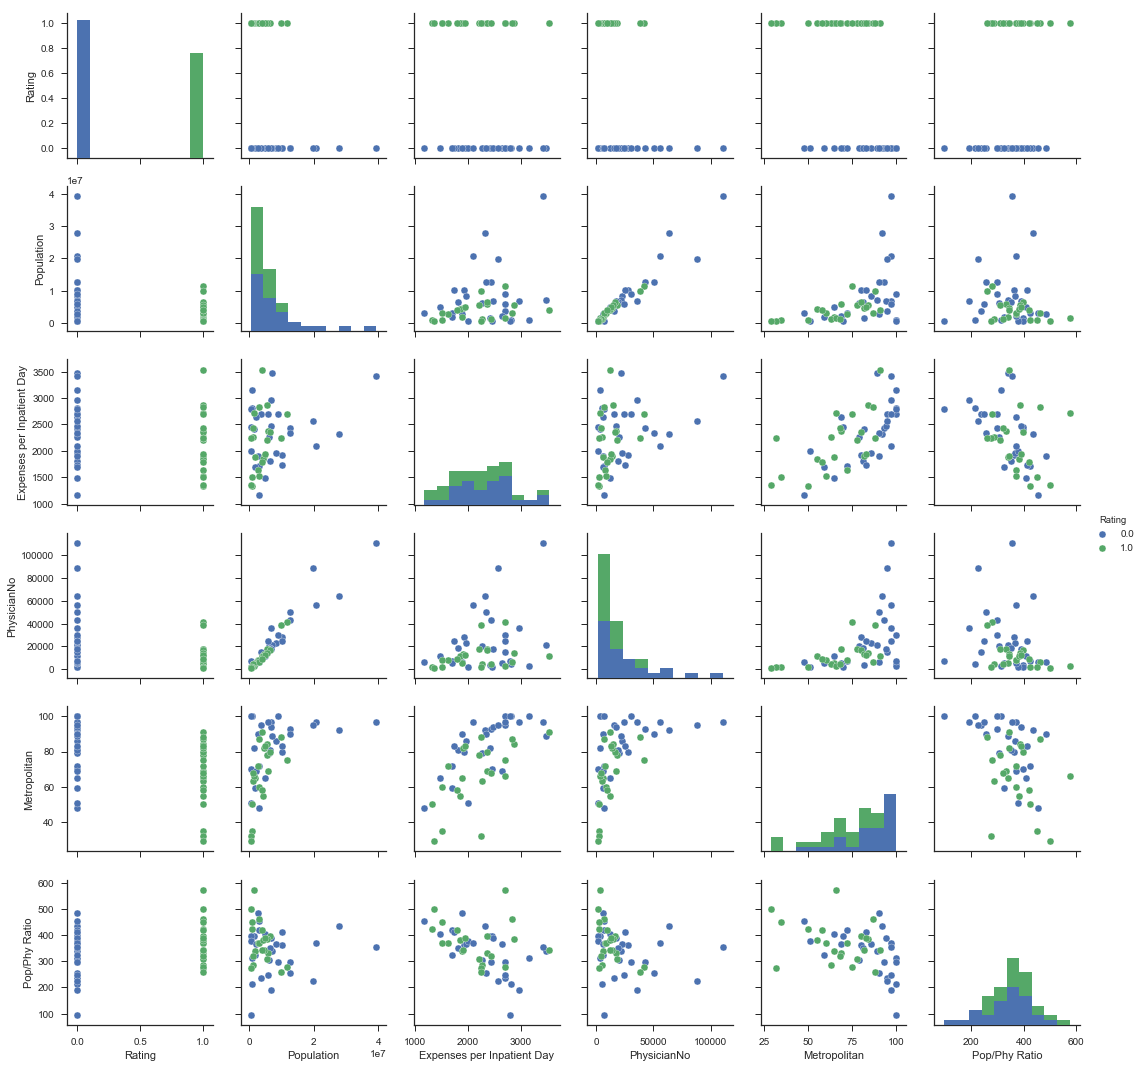

In [32]:
# scatter matrix
import seaborn as sns
sns.set(style="ticks")
dff['Rating'] = label
sns.pairplot(dff.iloc[:, [1,2,8,9,19,-1]], hue='Rating')

In [103]:
#dff.corr()

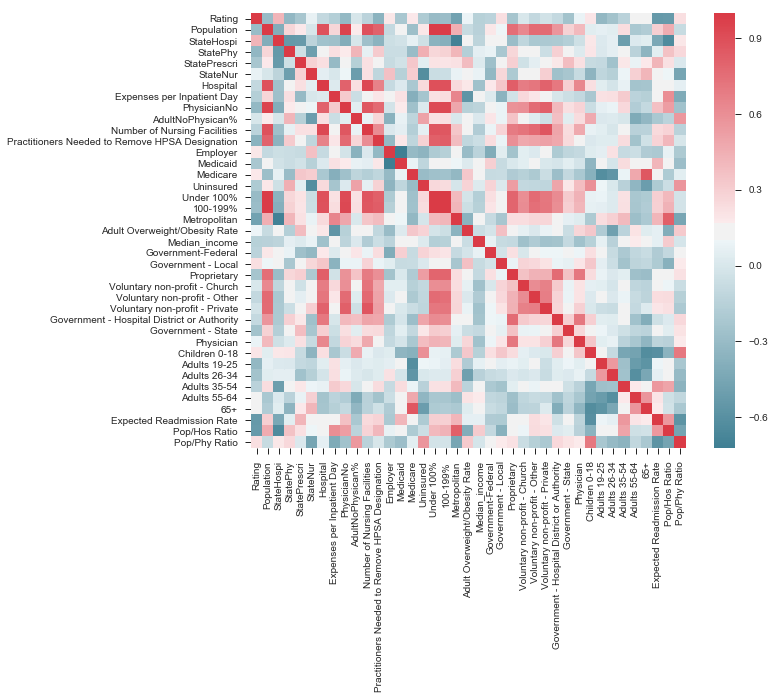

In [33]:
#plt.figure(figsize=(16,16))
#plt.matshow(dff.corr())
#pd.scatter_matrix(dff)
f, ax = plt.subplots(figsize=(10, 8))
corr = dff.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Health care quality is unbalanced throughout the states

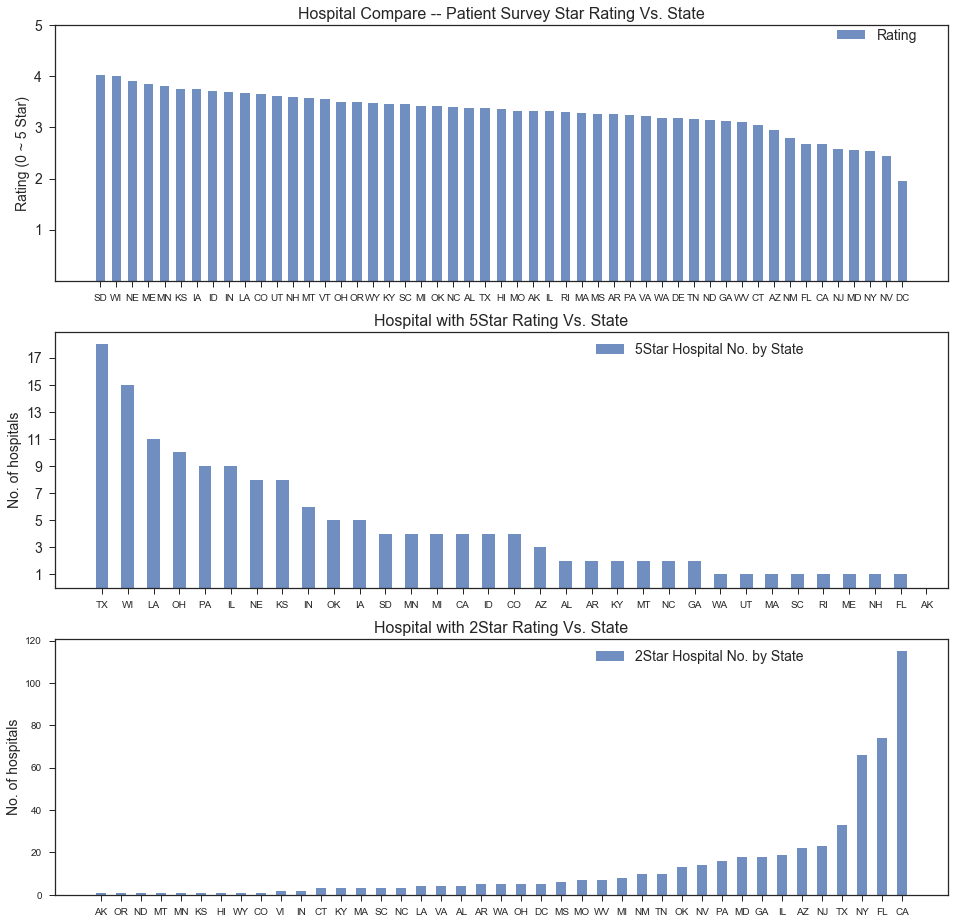

In [34]:
plt.figure(figsize=(16,16))
plt.subplot(3,1,1)
plt.bar(df_35['State'], df_35['Rating'], label='Rating', width=0.6, alpha=0.8)
plt.yticks([1,2,3,4,5],fontsize=14);

plt.legend(fontsize=14,loc=(0.87, 0.91))
ax = plt.gca()
ax.set_title('Hospital Compare -- Patient Survey Star Rating Vs. State', fontsize=16)
ax.set_ylabel('Rating (0 ~ 5 Star)',fontsize=14)
ax.set_xticklabels(df_35['State'], fontsize=10);
#ax2= ax.twinx()
#ax2.plot(df_35['State'], df_35['Population'], 'ro-', label='Population')
##ax2.set_ylabel('Population', fontsize=14)
#plt.legend(fontsize=14,loc=(0.87,0.88))
plt.subplot(3,1,2)
plt.bar(hospital_star['State'], hospital_star['5Star'],label='5Star Hospital No. by State',width=0.5, alpha=0.8)
plt.title('Hospital with 5Star Rating Vs. State', fontsize=16)
plt.yticks(range(1,18,2),fontsize=14)
plt.ylabel('No. of hospitals',fontsize=14)
plt.legend(loc=(0.6,0.88),fontsize=14)
plt.subplot(3,1,3)
plt.bar(hospital_2s['State'], hospital_2s['2Star'],label='2Star Hospital No. by State',width=0.5, alpha=0.8)
plt.title('Hospital with 2Star Rating Vs. State', fontsize=16)
#plt.yticks(range(1,18,2),fontsize=14)
plt.ylabel('No. of hospitals',fontsize=14)
plt.legend(loc=(0.6,0.88),fontsize=14)


# Important Feature Extraction

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
pca = PCA()
#X_data = dff.iloc[:, 2:]
#label = dff.iloc[:,1 ]
X = scaler.fit_transform(dff.iloc[:, 2:])
Xpca = pca.fit_transform(X)

In [36]:
#label = np.where(label<=3.40, 0.0,label)
#label = np.where((label<=3.50) & (label>2.7), 3.0, label)

In [37]:
#label = np.where(label>3.4, 1.0, label)
X.shape

(51, 38)

In [38]:
pca.explained_variance_ratio_

array([2.64021480e-01, 1.61552999e-01, 1.18148122e-01, 8.77403426e-02,
       5.76257839e-02, 4.66087501e-02, 4.00635749e-02, 3.00800656e-02,
       2.54759364e-02, 2.35087241e-02, 2.09309021e-02, 1.94206130e-02,
       1.58248569e-02, 1.40353887e-02, 1.22947319e-02, 1.06106426e-02,
       9.36977586e-03, 7.18606786e-03, 5.38574208e-03, 4.75192046e-03,
       3.88400999e-03, 3.61468124e-03, 3.41764191e-03, 3.18714706e-03,
       2.47639935e-03, 1.91409003e-03, 1.64009179e-03, 1.38901497e-03,
       1.13146247e-03, 8.46595401e-04, 8.12765654e-04, 4.80853698e-04,
       2.96673407e-04, 1.57509647e-04, 6.82847941e-05, 3.34205392e-05,
       1.24155969e-05, 5.22433735e-07])

Text(0,0.5,'% Variance Explained')

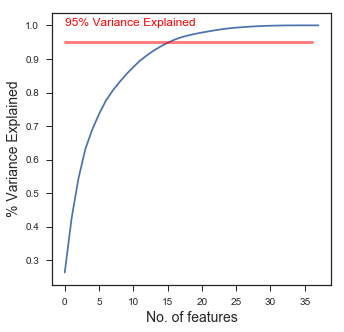

In [39]:
plt.figure(figsize=[5,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_), label= 'Training')
plt.plot([0,36], [0.95, 0.95], color = 'r', linewidth = 3, alpha = 0.5)
plt.annotate('95% Variance Explained', xy=(0,1), xytext=(0,1), color = 'r')
plt.xlabel('No. of features',fontsize=14)
plt.ylabel('% Variance Explained',fontsize=14)

In [40]:
#plt.figure(figsize=(6,6))
#plt.scatter(Xpca[:,0], Xpca[:,1], c=label, s=100, alpha=0.5,cmap=plt.get_cmap('jet'))
#plt.xlabel('PCA1',fontsize=14)
#plt.ylabel('PCA2',fontsize=14)
#plt.legend()

Top 10 important features are: 
Expected Readmission Rate
StatePhy
StateHospi
Hospital
Practitioners Needed to Remove HPSA Designation
StateNur
Medicaid
Pop/Hos Ratio
100-199%
Children 0-18


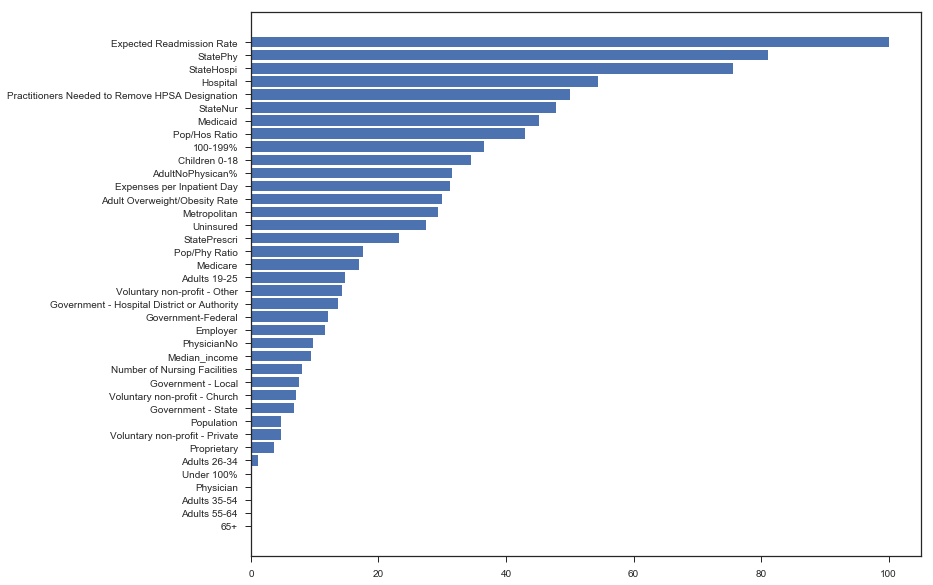

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_data, label)
importances = forest.feature_importances_
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_data.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 important features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
#plt.title('Relative Feature Importance', fontsize=20)
plt.show()

#forest.fit(X_train, y_train)
#train_score = np.mean(cross_val_score(forest, X_train, y_train, cv=10))
#test_score = forest.score(X_test, y_test)
#print ("Train score: {:.2%}".format(train_score))
#print('Test score: {:.2%}'.format(test_score) )

In [42]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=10.0,gamma=0.1)

In [43]:
scaler=MinMaxScaler()
X_data = dff.iloc[:, 2:]

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test,y_train, y_test = train_test_split(X_data, label,shuffle=True, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [44]:
clf.fit(X_train_scaled, y_train)
clf.score(X_train_scaled, y_train)

0.95

In [45]:
clf.score(X_test, y_test)

0.45454545454545453

In [48]:
train_score = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=10))
test_score = clf.score(X_test_scaled, y_test)
print ("SVM Train score: {:.2%}".format(train_score))
print('SVM Test score: {:.2%}'.format(test_score) )

SVM Train score: 77.50%
SVM Test score: 72.73%


# California Hospital Rating Analysis

In [49]:
df2 = df_year.copy()
df2['ZIP Code'] = df2['ZIP Code'].astype(np.str)
cali = df2[df2['State'] == 'CA']
cali['ZIP Code']=cali['ZIP Code'].astype(np.str)
cali = cali.groupby(['year', 'City','ZIP Code', 'Hospital Name'], as_index=False).mean()
cali_2016 = cali[cali['year']=='2016']

C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
gmap = pd.read_csv('free-zipcode-database.csv')
cal = gmap[gmap['State'] == 'CA']
cal = cal.drop(['RecordNumber', 'ZipCodeType', 'LocationType', 'TaxReturnsFiled','Zaxis', 
          'Notes', 'EstimatedPopulation', 'TotalWages', 'WorldRegion', 'Xaxis','Yaxis','Decommisioned'], axis=1)
cal.rename(columns={'Zipcode': 'ZIP Code'}, inplace=True)

cali_2016['ZIP Code']=cali_2016['ZIP Code'].astype(np.int64)

C:\Users\Ming\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [51]:
pop = pd.read_csv('Population_zip.csv')
pop.rename(columns={'Zip Code': 'ZIP Code', '2010 Census Population':'Population'}, inplace=True)
CA= pd.merge(pd.merge(cali_2016, cal, how='inner', on = ['ZIP Code']), pop, how='inner',on = ['ZIP Code'])

In [52]:
CA.drop(['Phone Number','City_y', 'LocationText', 'Location'], axis=1, inplace=True)

In [53]:
CA1 = CA[['Hospital Name', 'Population']]

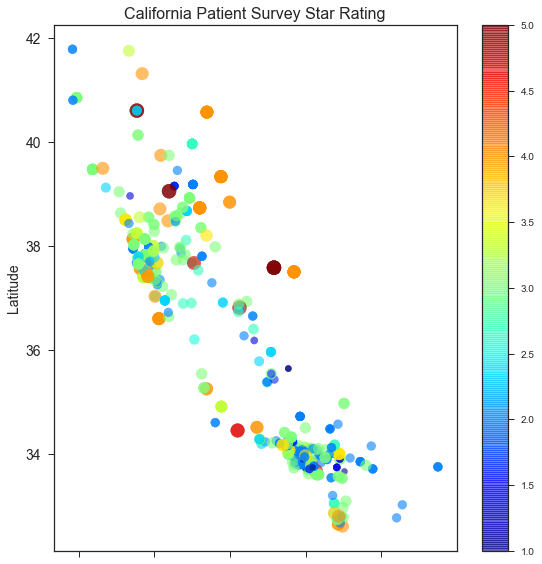

In [54]:
CA.plot(kind='scatter', x='Long', y='Lat', s = CA['Patient Survey Star Rating']*40, figsize=(8,8), fontsize=14,
        c= CA['Patient Survey Star Rating'],cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.6)
ax = plt.gca()
ax.set_title('California Patient Survey Star Rating', fontsize=16)
ax.set_ylabel('Latitude',fontsize=14)
ax.set_xlabel('Longitude',fontsize=14)

#plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('geomap.png')

In [55]:
dfad = pd.read_csv('CA_READ_MOR.csv')
df_ca = df_year.copy()
df_cb = df_ca[(df_ca['State'] == 'CA') & (df_ca['year'] == '2016')]
df_cc = df_cb[['State','Hospital Name' ,'Patient Survey Star Rating']]
df_cd=df_cc.groupby(['Hospital Name'], as_index=False).mean()
df_ce = pd.merge(df_cd, dfad, on='Hospital Name', how='inner')
df_cf = df_ce.drop(['City', 'State'], axis=1)
df_cf['Patient Survey Star Rating'] = round(df_cf['Patient Survey Star Rating'])
df_cf.fillna(df_cf.median(axis=0), inplace=True)

In [56]:
hour = pd.read_csv('Hours.csv')
hour = hour.rename(columns={'Facility Name':'Hospital Name'})

In [57]:
# Create New Features
hour['ToHour']= hour['Productive Hours Contracted Registry Nursing']+hour['Productive Hours Registered Nurse']+hour['Productive Hours Technician & Specialist']
hour['SerHour'] = hour['Productive Hours Environmental & Food Services']+hour['Productive Hours General Services Cost Centers']
hour['HourPerPat'] = hour['Productive Hours per Adjusted Patient Day Contracted Registry Nursing']+hour['Productive Hours per Adjusted Patient Day Registered Nurse']+hour['Productive Hours per Adjusted Patient Day Technician & Specialist']
hour['SerHourPerPat'] = hour['Productive Hours per Adjusted Patient Day Administrative Services Cost Centers'] + hour['Productive Hours per Adjusted Patient Day General Services Cost Centers']

In [58]:
df_ch = pd.merge(pd.merge(df_cf, hour, on='Hospital Name', how='inner'), CA1, on='Hospital Name', how='inner')
df_ch.drop(['County Name'], axis=1, inplace=True)

In [59]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 25 columns):
Hospital Name                                                                     314 non-null object
Patient Survey Star Rating                                                        314 non-null float32
MORT_30_COPD                                                                      314 non-null float64
MORT_30_HF                                                                        314 non-null float64
MORT_30_PN                                                                        314 non-null float64
READM_30_COPD                                                                     314 non-null float64
READM_30_HF                                                                       314 non-null float64
READM_30_HOSP_WIDE                                                                314 non-null float64
READM_30_PN                                                             

# Feature dimension reduction

In [60]:
X = df_ch.iloc[:, 2:]
y = df_ch.iloc[:, 1]

In [61]:
y_s = y.copy()

y_s = np.where(y_s<=2.0, 0, y_s)
y_s = np.where(y_s > 2.0, 5, y_s)

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
pca = PCA()

X_data = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_data)
pca.explained_variance_ratio_

array([2.84752338e-01, 1.62772609e-01, 1.32340223e-01, 1.09208951e-01,
       7.23243416e-02, 5.18664984e-02, 4.14601642e-02, 3.90435948e-02,
       2.63770573e-02, 2.40261490e-02, 2.16527257e-02, 1.32191952e-02,
       6.51737352e-03, 5.97996960e-03, 3.71325996e-03, 1.97417042e-03,
       1.79216057e-03, 7.42607042e-04, 2.36612109e-04, 2.50425772e-32,
       8.42639982e-33, 5.47232837e-33, 1.54863294e-33])

Text(0,0.5,'% Variance Explained')

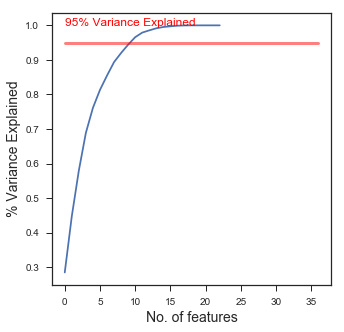

In [63]:
#plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0],X_pca[:,1], c=y_s, s=100, alpha=0.8)
plt.figure(figsize=[5,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_), label= 'Training')
plt.plot([0,36], [0.95, 0.95], color = 'r', linewidth = 3, alpha = 0.5)
plt.annotate('95% Variance Explained', xy=(0,1), xytext=(0,1), color = 'r')
plt.xlabel('No. of features',fontsize=14)
plt.ylabel('% Variance Explained',fontsize=14)

Top 10 important features are: 
READM_30_HF
Productive Hours per Adjusted Patient Day Environmental & Food Services
Productive Hours General Services Cost Centers
Productive Hours per Adjusted Patient Day Technician & Specialist
Productive Hours Technician & Specialist
Population
SerHourPerPat
READM_30_PN
ToHour
READM_30_HOSP_WIDE


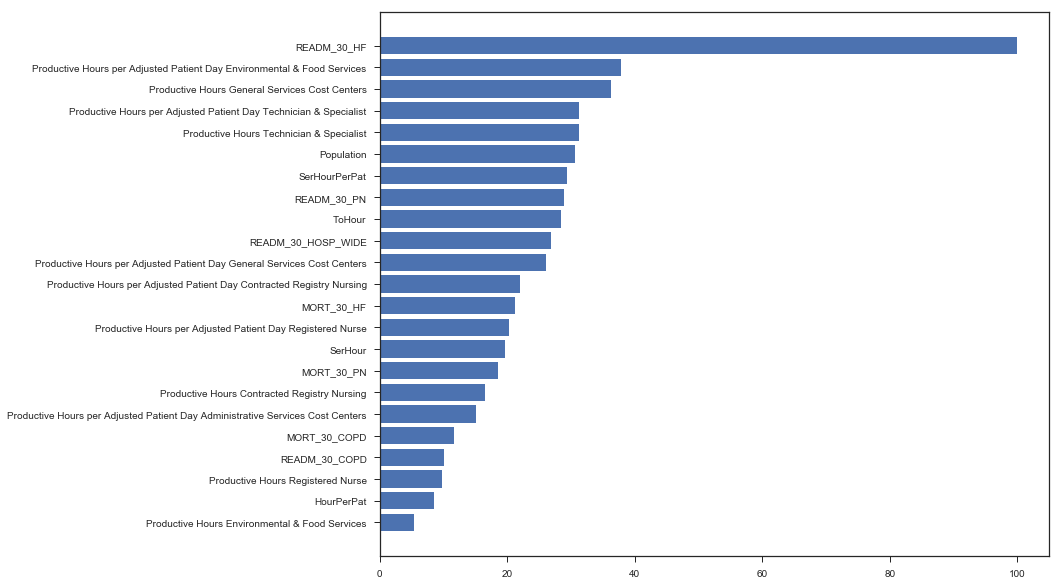

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_data, y_s)
importances = forest.feature_importances_
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 important features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
#plt.title('Relative Feature Importance', fontsize=20)
plt.show()

# Fit Model and make predictions

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

X_train, X_test,y_train, y_test = train_test_split(X, y_s,shuffle=True, test_size=0.2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
train_score = lr.score(X_train_scaled, y_train)
test_score = lr.score(X_test_scaled, y_test)
print ("Train score: {:.2%}".format(train_score))
print('Test score: {:.2%}'.format(test_score) )
print('Model has high bias which could be improved by introducing more features.')

Train score: 75.30%
Test score: 68.25%
Model has high bias which could be improved by introducing more features.


In [72]:
# SVM
clf_CA=SVC(kernel='rbf',C=10,gamma = 3)
clf_CA.fit(X_train_scaled, y_train)
train_score = clf_CA.score(X_train_scaled, y_train)
test_score = clf_CA.score(X_test_scaled, y_test)
print ("Train score: {:.2%}".format(train_score))
print('Test score: {:.2%}'.format(test_score) )
print('Model has high variance which could be reduced by collecting more data and introduce L2 regularizations.')

Train score: 100.00%
Test score: 87.30%
Model has high variance which could be reduced by collecting more data and introduce L2 regularizations.


In [270]:
# RandomForest
#random_classifier = RandomForestClassifier()

#parameters = { 'max_features':np.arange(5,10),'n_estimators':[200,500],'min_samples_leaf': [10,50,100,200,500], 'max_depth' : [4,5,6,7,8],
    #'criterion' :['gini', 'entropy']}

#random_grid = GridSearchCV(random_classifier, parameters, cv = 5)
#random_grid.fit(X_train_scaled, y_train)
#random_grid.best_params_

In [271]:
#forest2 = RandomForestClassifier(max_features= 8, min_samples_leaf= 10, n_estimators=200,criterion='entropy',max_depth=4 )
#forest2.fit(X_train_scaled, y_train)
#train_score = forest2.score(X_train_scaled, y_train)
#train_score = forest2.score(X_test_scaled, y_test)
print ("Train score: {:.2%}".format(train_score))
print('Test score: {:.2%}'.format(test_score) )

Train score: 67.67%
Test score: 63.64%


# Conclusion:

### I. There is unbalanced hosptail rating through US.
### II. Reasons for unblance is not only due to hospital quality but also related to demographic and socioecnomic conditions.
### III. Readmission rate is a strong indicator for hospital star review.
### IV. Achieved 88% acuracy on hospital rating prediction in CA. The model could be further improved after reduing high variance.

In [90]:
rate = pd.read_csv('ca-oshpd-ahrq-imi-long-1215.csv',encoding = 'cp1252')

In [91]:
rate = rate.iloc[17:]

In [92]:
rate.YEAR.unique()

array([2012, 2013, 2014, 2015], dtype=int64)

In [101]:
rate['Hospital Ratings'].unique()

array(['As Expected', 'Better', 'Worse', nan], dtype=object)

In [100]:
rate.plot(kind='bar',x = 'HOSPITAL', y = 'Hospital Ratings')

TypeError: Empty 'DataFrame': no numeric data to plot